In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
# Specify the path to the file
df = pd.read_csv('Data\Fraudulent_E-Commerce_Transaction_Data.csv')

# Print the contents of the file (panda's table formate)
df.head()

# Open the file and read its contents
#with open(file_path, 'r') as file:
#file_contents = file.read()

# Print the contents of the file
#print(file_contents)(if we does not want panda's table formate)



,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 5:58,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 8:09,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 3:42,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 5:08,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


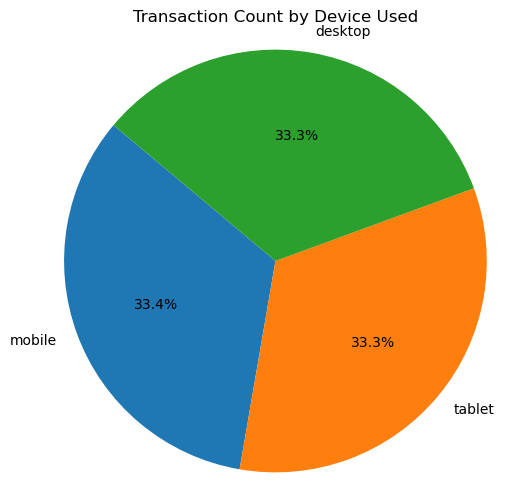

In [12]:
# Group the DataFrame by "Device Used" and count the occurrences of each device
device_counts = df.groupby('Device Used')['Transaction ID'].count().reset_index()

# Rename the column to reflect the count
device_counts.rename(columns={'Transaction ID': 'Transaction Count'}, inplace=True)

# Sort the DataFrame by transaction count in descending order
device_counts.sort_values(by='Transaction Count', ascending=False, inplace=True)

# Create the Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(device_counts['Transaction Count'], labels=device_counts['Device Used'], autopct='%1.1f%%', startangle=140)
plt.title('Transaction Count by Device Used')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()